In [ ]:
from google.colab import files

# if you want to upload file from local enviornment
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import torch

USE_GPU = True
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('using device:', device)

using device: cuda


In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/data_jpg'

dataset = ImageFolder(data_dir, transform=ToTensor())
print(dataset)

Mounted at /content/drive
Dataset ImageFolder
    Number of datapoints: 3153
    Root location: /content/drive/MyDrive/data_jpg
    StandardTransform
Transform: ToTensor()


In [ ]:
# review the class in the folder
classes = os.listdir(data_dir)
print(f'Total Number of Classe {len(classes)}')
print(f'Classes Names: {classes}')

Total Number of Classe 14
Classes Names: ['绿豆糕', '小芋圆豆花', '抹茶鸡蛋仔', '原味冰淇凌鸡蛋仔', '双芋招牌', '小芋圆奶茶', '杏仁布丁', 'Q麻薯拼盘', '鲜奶巧克力黑糖珍珠奶茶', '小芋圆冬瓜茶', '焦糖布丁', '芋圆招牌', '鲜芋仙招牌', '布丁Q麻薯牛奶冰']


In [ ]:
# check the size of the image
img, label = dataset[0]
img_shape = img.shape
img_shape

torch.Size([3, 798, 828])

Label (numeric): 6
Label (textual): 杏仁布丁


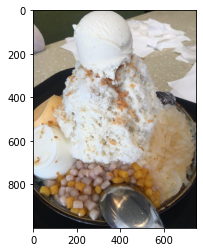

In [ ]:
# check the picutre of images
img, label = dataset[1000]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [ ]:
dataset_size = len(dataset)
classes = dataset.classes
num_classes = len(dataset.classes)

img_dict = {}
for i in range(num_classes):
    img_dict[classes[i]] = 0
    
for i in range(dataset_size):
    img, label = dataset[i]
    img_dict[classes[label]] += 1


## Plotting classes along with images info

from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(16, 32))

ax.barh(list(img_dict.keys()), list(img_dict.values()))



# Add Plot Title
ax.set_title('Each Class along with their values',
             loc ='left', )

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.show()

KeyboardInterrupt: ignored

In [ ]:
tfms = tt.Compose([
                      tt.RandomCrop(100, padding=4, padding_mode='reflect'), 
                      tt.Resize((100,100)),
                      tt.RandomHorizontalFlip(), 
                      tt.RandomRotation(45),
                      # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                      # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                      tt.ToTensor(),
                         ])

In [ ]:
dataset = ImageFolder(data_dir, transform=tfms)
train_size= int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))+1
test_size = int(0.15 * len(dataset))+1
print(train_size+val_size+test_size)
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_size, val_size, test_size],generator=torch.Generator().manual_seed(5))

3153


In [ ]:
batch_size=16

train_loader = DataLoader(train_set, batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size)
test_loader = DataLoader(test_set, batch_size)

In [ ]:
import torch.nn.functional as F
import torch.nn as nn
from torch.nn import init


class Classifier (nn.Module):
    # Build the model architecture
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Thrid Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Fourth Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=14)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)
 

    # Forward pass computations
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
myModel = Classifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cuda', index=0)

In [ ]:
from torchvision import models
from torchsummary import summary
summary(myModel, (3,100,100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 50, 50]             608
            Conv2d-2            [-1, 8, 50, 50]             608
              ReLU-3            [-1, 8, 50, 50]               0
              ReLU-4            [-1, 8, 50, 50]               0
       BatchNorm2d-5            [-1, 8, 50, 50]              16
       BatchNorm2d-6            [-1, 8, 50, 50]              16
            Conv2d-7           [-1, 16, 25, 25]           1,168
            Conv2d-8           [-1, 16, 25, 25]           1,168
              ReLU-9           [-1, 16, 25, 25]               0
             ReLU-10           [-1, 16, 25, 25]               0
      BatchNorm2d-11           [-1, 16, 25, 25]              32
      BatchNorm2d-12           [-1, 16, 25, 25]              32
           Conv2d-13           [-1, 32, 13, 13]           4,640
           Conv2d-14           [-1, 32,

In [ ]:
import time
from torchvision import models
validation_loss_history = []
validation_acc_history = []
training_loss_histroy = []
training_acc_history = []
# Training Loop
# ----------------------------
def training(train_dl, num_epochs, model):
  """
  Loss Function, Optimizer and Scheduler
  Loss Function: For multi-class problem, Cross Entropy and KL divergence are the
                 loss often used.
  Learning Rating - OneCycleLR: Sets the learning rate of each parameter group 
  according to the 1cycle learning rate policy. The 1cycle policy anneals the 
  learning rate from an initial learning rate to some maximum learning rate and 
  then from that maximum learning rate to some minimum learning rate much lower 
  than the initial learning rate.
  """
  


  if model == 'baseline':
    model_save_name = 'classifier_baseline.pt'
    model = myModel
    print(f'model={myModel}')
  elif model == 'VGG':
    model_save_name = 'classifier_vgg19bn.pt'
    model = models.vgg19_bn(pretrained=True).cuda()
    for param in model.parameters():
      param.requires_grad = False
    first_conv_layer = [nn.Conv2d(2, 3, kernel_size=3, stride=1, padding=1, dilation=1, groups=1, bias=True)]
    first_conv_layer.extend(list(model.features))  
    model.features= nn.Sequential(*first_conv_layer )  

    # add the classifier
    model.classifier[6] = nn.Sequential(
                          nn.Linear(in_features=4096, out_features=256, bias=True),
                          nn.ReLU(),
                          nn.Dropout(0.4),
                          nn.Linear(in_features=256, out_features=10, bias=True),
                          )
    model = model.to(device)
  elif model == 'ResNet':
    model_save_name = 'classifier_resnext101-unfreezed-100epooch.pt'
    model = models.resnext101_32x8d(pretrained=True).cuda()

    model = nn.Sequential(
      nn.Conv2d(2, 3, kernel_size=3, stride=1, padding=1, dilation=1, groups=1, bias=True),
      model)
    model.fc = nn.Sequential(
        nn.Linear(1000,10,bias=True))
    model = model.to(device)
    for param in model.parameters():
      param.requires_grad = True

  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')


  # Repeat for each epoch
  print('Started Training')
  st_time = time.time()
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set
    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
        inputs, labels = torch.tensor(data[0]).to(device), torch.tensor(data[1]).to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

        if i % 20 == 0 and i != 0:    # print every 50 mini-batches
           print('At epoch {}, batch {}, having loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / i))
    
    # Print stats at the end of the epoch
    
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    training_loss_histroy.append(avg_loss)
    training_acc_history.append(acc)
    print(f'Epoch: {epoch+1}, Loss: {avg_loss:.3f}, Training Accuracy: {acc:.3f}')
    

    # if (epoch+1) % 5 == 0:
      # check the accuracy every 5 epoch
    inference(model, val_loader)

  et_time = time.time()
  path = F"/content/drive/MyDrive/{model_save_name}" 
  torch.save(model.state_dict(), path)
  print('Finished Training')
  print('The training time is {:.3f} seconds'.format(et_time-st_time))
num_epochs= 20
training(train_loader, num_epochs, model='baseline')


model=Classifier(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (relu1): ReLU()
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu2): ReLU()
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu3): ReLU()
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (relu4): ReLU()
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (ap): AdaptiveAvgPool2d(output_size=1)
  (lin): Linear(in_features=64, out_features=14, bias=True)
  (conv): Sequential(
    (0): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
    (2): BatchNorm2d(8, eps=1e-05, mom

In [ ]:
def inference (model, val_dl):
  correct_prediction_val = 0
  total_prediction_val = 0
  running_loss_val = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      criterion = nn.CrossEntropyLoss()
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = torch.tensor(data[0]).to(device), torch.tensor(data[1]).to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      running_loss_val += loss.item()
      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction_val += (prediction == labels).sum().item()
      total_prediction_val += prediction.shape[0]
  num_batches = len(val_dl)
  avg_loss = running_loss_val / num_batches
  acc = correct_prediction_val/total_prediction_val
  validation_loss_history.append(avg_loss)
  validation_acc_history.append(acc)
    
  print(f'Validation Accuracy: {acc:.2f}, Validation Loss: {running_loss_val/num_batches:3f} Total items: {total_prediction_val}')

# Run inference on trained model with the validation set
# inference(myModel, val_dl)